In [235]:
import os
import cv2
import xml.etree.ElementTree as ET

In [236]:
train_path = r'C:\Users\sedth\PycharmProjects\pythonProject\FaceNet\train'
val_path =  r'C:\Users\sedth\PycharmProjects\pythonProject\FaceNet\valid'


## IMAGE PROCCESSING 

In [237]:

def get_bbox_from_xml(xml_path):
    LABELS={'Kloem':0, 'Pao':1}
    tree = ET.parse(xml_path)
    obj = tree.find('object')
    bbox = obj.find('bndbox')
    label = obj.find('name').text
    return [int(bbox.find('xmin').text), int(bbox.find('ymin').text),
            int(bbox.find('xmax').text), int(bbox.find('ymax').text),LABELS[label]]

images = []
bounding_boxes = []

for file_name in os.listdir(train_path):
    if file_name.endswith('.jpg'):
        img_path = os.path.join(train_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        images.append(img)

        xml_file = os.path.join(train_path, file_name[:-4] + '.xml')
        if os.path.exists(xml_file):
            bbox = get_bbox_from_xml(xml_file)
            bounding_boxes.append(bbox)
        else:
            print(f"Annotation file not found for {file_name}")

In [238]:
val_images = []
val_bounding_boxes = []
for file_name in os.listdir(val_path):
    if file_name.endswith('.jpg'):
        img_path = os.path.join(val_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        val_images.append(img)

        xml_file = os.path.join(val_path, file_name[:-4] + '.xml')
        if os.path.exists(xml_file):
            bbox = get_bbox_from_xml(xml_file)
            val_bounding_boxes.append(bbox)
        else:
            print(f"Annotation file not found for {file_name}")

## PREPARE DATA SET

In [239]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class FaceDetectionDataset(Dataset):
    def __init__(self, images, bounding_boxes, transform=None):
        self.images = images
        self.bounding_boxes = bounding_boxes
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):

        image = self.images[idx]
        bbox = self.bounding_boxes[idx][:4]
        label = self.bounding_boxes[idx][4]
        if self.transform:
            image = self.transform(image)
        else:
            image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0 
        
        bbox = torch.tensor(bbox, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.int64)

        return image, label


## Augmentation

In [240]:
transform1 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((160, 160)),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                       std=[0.229, 0.224, 0.225]),
])

## LOAD DATA

In [241]:
from torch.utils.data import DataLoader
data = FaceDetectionDataset(images, bounding_boxes, transform=transform1)
val_dataset = FaceDetectionDataset(val_images, val_bounding_boxes, transform=transform1)
batch_size = 8
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [242]:
for batch_idx, (images,labels) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}")
    print(f"Images shape: {images.shape}") 
    print(f"Labels: {labels}")  
    


Batch 1
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 0, 0, 0, 0, 1, 1])
Batch 2
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([0, 1, 1, 1, 1, 1, 0, 1])
Batch 3
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 0, 0, 1, 0, 1, 0])
Batch 4
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([0, 1, 1, 1, 1, 0, 0, 0])
Batch 5
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([0, 0, 1, 0, 1, 1, 1, 0])
Batch 6
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([0, 0, 1, 1, 1, 0, 1, 1])
Batch 7
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([0, 1, 1, 1, 1, 1, 0, 1])
Batch 8
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 1, 0, 1, 0, 1, 1])
Batch 9
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 1, 1, 1, 1, 0, 1])
Batch 10
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 0, 1, 0, 0, 1, 0])
Batch 11
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([0, 1, 0, 1,

In [243]:
for batch_idx, (images,labels) in enumerate(val_loader):
    print(f"Batch {batch_idx + 1}")
    print(f"Images shape: {images.shape}") 
    print(f"Labels: {labels}")  


Batch 1
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 1, 1, 1, 1, 1, 1])
Batch 2
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 1, 1, 1, 1, 1, 1])
Batch 3
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 1, 1, 1, 1, 1, 1])
Batch 4
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([1, 1, 0, 0, 0, 0, 0, 0])
Batch 5
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0])
Batch 6
Images shape: torch.Size([8, 3, 160, 160])
Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0])
Batch 7
Images shape: torch.Size([1, 3, 160, 160])
Labels: tensor([0])


In [244]:
for batch_idx, (images,labels) in enumerate(dataloader):
    print(images)
    print(f"total batch {batch_idx+1}")

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -

In [245]:
import numpy as np
import matplotlib.pyplot as plt

# for batch_idx, (images, bboxes, labels) in enumerate(dataloader):
#     for i in range(len(images)):
#         img = images[i].permute(1, 2, 0).numpy() 
#         img = (img * 255).astype(np.uint8) 
#         bbox = bboxes[i].numpy()  
#         plt.imshow(img)
#         plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], 
#                                           edgecolor='red', facecolor='none', linewidth=2))
#         plt.title(f"Label: {labels[i].item()}")
#         plt.show()
#     break  


## LOAD MODEL(FaceNET)

In [246]:
from facenet_pytorch import InceptionResnetV1
import torch.nn as nn
from tqdm import tqdm

class MultiTaskModel(nn.Module):
    def __init__(self, num_classes):
        super(MultiTaskModel, self).__init__()

        self.backbone = InceptionResnetV1(pretrained='vggface2')
        
        self.classifier = nn.Sequential(
            nn.Linear(512, 256), 
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        features = self.backbone(x) 
        class_logits = self.classifier(features)
        
        return class_logits

num_classes = 2
net = MultiTaskModel(num_classes)


D:\Self_Program\D_Program\Lib\site-packages\facenet_pytorch\models\inception_resnet_v1.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(cached_f

In [247]:
images = torch.rand(16, 3, 160, 160) 
class_logits = net(images)

print("Class Logits Shape:", class_logits.shape)  # Expected: (8, num_classes)


Class Logits Shape: torch.Size([16, 2])


## Loss Function and Optimize

In [248]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiTaskModel(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1)


In [249]:
# import torch

# print(f"Is CUDA available? {torch.cuda.is_available()}")
# print(f"CUDA version: {torch.version.cuda}")
# print(f"PyTorch version: {torch.__version__}")
# if torch.cuda.is_available():
#     print(f"Device Name: {torch.cuda.get_device_name(0)}")


In [250]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = net.to(device)
model

MultiTaskModel(
  (backbone): InceptionResnetV1(
    (conv2d_1a): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (conv2d_2a): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (conv2d_2b): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2d_3b): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=Tr

In [251]:
device

device(type='cuda')

## Training Function

In [252]:
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(loader, desc='Training'):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    epoch_loss = running_loss / len(loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

## Validation Function

In [253]:
def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(loader, desc='Validation'):
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    epoch_loss = running_loss / len(loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

## TRAINING 

In [254]:
num_epochs = 20
train_losses = []
train_accs = []
val_losses = []
val_accs = []
best_val_acc = 0

for epoch in range(num_epochs):
    # Training phase
    train_loss, train_acc = train_epoch(model, dataloader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validation phase
    val_loss, val_acc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    # Learning rate scheduling
    scheduler.step(val_loss)
    
    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
    
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    print('-' * 50)

Validation: 100%|██████████| 7/7 [00:00<00:00, 34.93it/s]


Epoch [1/20]
Train Loss: 0.4929, Train Acc: 87.72%
Val Loss: 0.3401, Val Acc: 87.76%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 34.86it/s]


Epoch [2/20]
Train Loss: 0.2841, Train Acc: 91.81%
Val Loss: 1.3745, Val Acc: 46.94%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 43.48it/s]


Epoch [3/20]
Train Loss: 0.2159, Train Acc: 92.40%
Val Loss: 0.0969, Val Acc: 97.96%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.76it/s]


Epoch [4/20]
Train Loss: 0.0712, Train Acc: 98.83%
Val Loss: 0.3818, Val Acc: 83.67%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.91it/s]


Epoch [5/20]
Train Loss: 0.2783, Train Acc: 92.40%
Val Loss: 0.0216, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 46.47it/s]


Epoch [6/20]
Train Loss: 0.0714, Train Acc: 98.25%
Val Loss: 0.0239, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.82it/s]


Epoch [7/20]
Train Loss: 0.0427, Train Acc: 99.42%
Val Loss: 0.0234, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 45.02it/s]


Epoch [8/20]
Train Loss: 0.1362, Train Acc: 98.25%
Val Loss: 0.0095, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 43.79it/s]


Epoch [9/20]
Train Loss: 0.1317, Train Acc: 96.49%
Val Loss: 0.9343, Val Acc: 91.84%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 40.41it/s]


Epoch [10/20]
Train Loss: 0.1405, Train Acc: 97.66%
Val Loss: 0.0109, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.04it/s]


Epoch [11/20]
Train Loss: 0.0435, Train Acc: 99.42%
Val Loss: 0.0163, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 43.96it/s]


Epoch [12/20]
Train Loss: 0.0199, Train Acc: 99.42%
Val Loss: 0.0069, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.46it/s]


Epoch [13/20]
Train Loss: 0.1314, Train Acc: 98.25%
Val Loss: 0.5323, Val Acc: 87.76%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.96it/s]


Epoch [14/20]
Train Loss: 0.0718, Train Acc: 98.25%
Val Loss: 0.0115, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 43.61it/s]


Epoch [15/20]
Train Loss: 0.0611, Train Acc: 97.08%
Val Loss: 0.0130, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.86it/s]


Epoch [16/20]
Train Loss: 0.0151, Train Acc: 99.42%
Val Loss: 0.0044, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 43.56it/s]


Epoch [17/20]
Train Loss: 0.1650, Train Acc: 98.83%
Val Loss: 0.0027, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 45.08it/s]


Epoch [18/20]
Train Loss: 0.1573, Train Acc: 95.32%
Val Loss: 0.7382, Val Acc: 79.59%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.32it/s]


Epoch [19/20]
Train Loss: 0.0259, Train Acc: 100.00%
Val Loss: 0.0065, Val Acc: 100.00%
--------------------------------------------------


Validation: 100%|██████████| 7/7 [00:00<00:00, 44.67it/s]

Epoch [20/20]
Train Loss: 0.0167, Train Acc: 99.42%
Val Loss: 0.0025, Val Acc: 100.00%
--------------------------------------------------


## # Plotting training curves

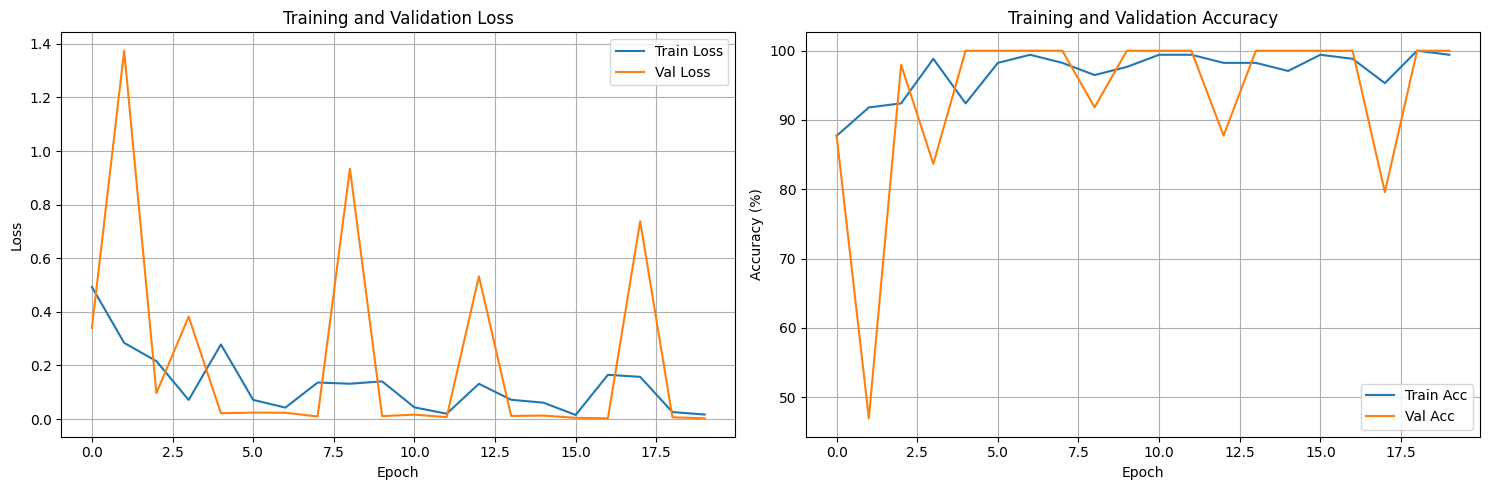

In [256]:
plt.figure(figsize=(15, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<!-- net.eval()
with torch.no_grad():
    for images, bboxes, labels in val_loader:
        images, bboxes, labels = images.to(device), bboxes.to(device), labels.to(device)

        class_logits, bbox_preds = net(images)
        class_loss = classification_loss_fn(class_logits, labels)
        bbox_loss = bbox_loss_fn(bbox_preds, bboxes)

        # Log results or calculate metrics here -->


In [153]:
# net.eval()
# with torch.no_grad():
#     for images, bboxes, labels in val_loader:
#         images, bboxes, labels = images.to(device), bboxes.to(device), labels.to(device)

#         class_logits, bbox_preds = net(images)
#         class_loss = classification_loss_fn(class_logits, labels)
#         bbox_loss = bbox_loss_fn(bbox_preds, bboxes)

#         # Log results or calculate metrics here


In [154]:
# import matplotlib.pyplot as plt

# def visualize(image, bbox, label):
#     plt.imshow(image.permute(1, 2, 0).cpu().numpy())
#     x1, y1, x2, y2 = bbox
#     plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
#                                        edgecolor='red', facecolor='none', lw=2))
#     plt.title(f"Label: {label}")
#     plt.show()

# # Visualize one batch
# images, bboxes, labels = next(iter(val_loader))
# for i in range(len(images)):
#     visualize(images[i], bboxes[i], labels[i].item())


## SAVE MODEL

In [155]:
# torch.save(net, "facenet_full_model_cls.pth")

In [ ]:
# torch.save(net.state_dict(), "faceNet.pth")
# To load:
# net.load_state_dict(torch.load("facenet.pth"))
# net.eval()


In [257]:
from torchsummary import summary
summary(net,input_size=(3,160,160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 79, 79]             864
       BatchNorm2d-2           [-1, 32, 79, 79]              64
              ReLU-3           [-1, 32, 79, 79]               0
       BasicConv2d-4           [-1, 32, 79, 79]               0
            Conv2d-5           [-1, 32, 77, 77]           9,216
       BatchNorm2d-6           [-1, 32, 77, 77]              64
              ReLU-7           [-1, 32, 77, 77]               0
       BasicConv2d-8           [-1, 32, 77, 77]               0
            Conv2d-9           [-1, 64, 77, 77]          18,432
      BatchNorm2d-10           [-1, 64, 77, 77]             128
             ReLU-11           [-1, 64, 77, 77]               0
      BasicConv2d-12           [-1, 64, 77, 77]               0
        MaxPool2d-13           [-1, 64, 38, 38]               0
           Conv2d-14           [-1, 80,

<!-- import matplotlib.pyplot as plt

def visualize(image, bbox, label):
    plt.imshow(image.permute(1, 2, 0).cpu().numpy())
    x1, y1, x2, y2 = bbox
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                       edgecolor='red', facecolor='none', lw=2))
    plt.title(f"Label: {label}")
    plt.show()

# Visualize one batch
images, bboxes, labels = next(iter(val_loader))
for i in range(len(images)):
    visualize(images[i], bboxes[i], labels[i].item()) -->
